In [144]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [28]:
sns.set(style='whitegrid')

In [107]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [108]:
df['partner_cat'] = np.where(df['partner'] == 1, 'has_partner', 'no_partner')

In [34]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
Y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'gndr'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X = pd.concat([X, pd.get_dummies(df['gndr'], drop_first=True, prefix='gndr')], axis=1)
X = pd.concat([X, pd.get_dummies(df['year'], drop_first=True, prefix='year')], axis=1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=351)

In [8]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(
    n_estimators=500,
    max_depth=2,
    loss='deviance'
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04814511729405346
Percent Type II errors: 0.17471358428805236

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.18527607361963191


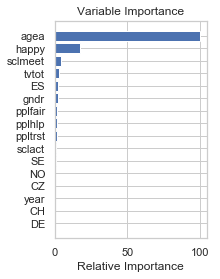

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

sns.set(style='whitegrid')

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [22]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(
    n_estimators=1000,
    max_depth=6,
    loss='exponential',
    max_features=16
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.08773006134969324
Percent Type II errors: 0.1785276073619632


Changing the loss function to exponential resulted in a largescale overfit to the train set. Type I & II errors approach zero while the test set % of error is 8-17%

Training set accuracy:
Percent Type I errors: 0.010894583397268683
Percent Type II errors: 0.05815559306429339

Test set accuracy:
Percent Type I errors: 0.09631901840490797
Percent Type II errors: 0.16441717791411042


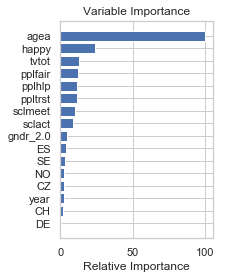

In [46]:
#re-running with gender feature engineered
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(
    n_estimators=4000,
    max_depth=3,
    loss='deviance',
    max_features=16,
    subsample=0.95
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

sns.set(style='whitegrid')

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

This model seemed to trade off the % of Type I errors for Type II errors. It's not overfitting to the training set anymore, but the % of Type II errors in the test set has gone up from the original model

In [54]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


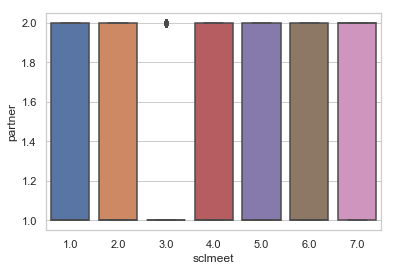

In [81]:
sns.boxplot(
    x=df.sclmeet,
    y=df.partner
)
plt.show()



Based on the boxplot above, respondants who meet with friends once a month are more likely to have a partner than anyone else. This could be helpful in decreasing the % of errors in the models above. Let's re-run those now and see if we have any imporovement.

In [90]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
Y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'gndr', 'sclmeet', 'year'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X = pd.concat([X, pd.get_dummies(df['gndr'], drop_first=True, prefix='gndr')], axis=1)
X = pd.concat([X, pd.get_dummies(df['year'], drop_first=True, prefix='year')], axis=1)
X = pd.concat([X, pd.get_dummies(df['sclmeet'], prefix='sclmeet')], axis=1)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=351)

Training set accuracy:
Percent Type I errors: 0.010894583397268683
Percent Type II errors: 0.05830903790087463

Test set accuracy:
Percent Type I errors: 0.09631901840490797
Percent Type II errors: 0.1705521472392638


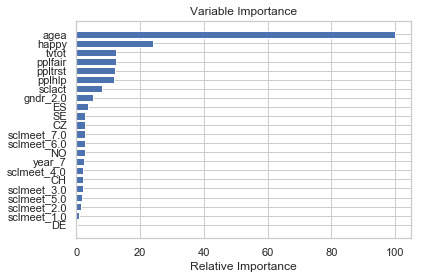

In [92]:
#re-running with sclmeet_3 binarized
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(
    n_estimators=4000,
    max_depth=3,
    loss='deviance',
    max_features=16,
    subsample=0.95
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

That seemed to help decrease the Type II errors, but the Type I are still high.

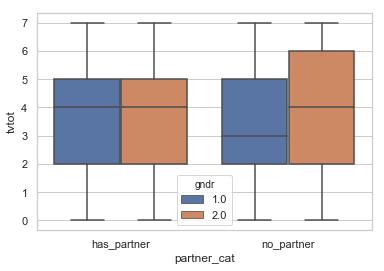

In [125]:
sns.boxplot(
    data=df,
    x='partner_cat',
    y='tvtot',
    hue='gndr'
)

plt.show()

Increasing tvtot means the respondent watched increasingly more and more tv every week. The numbers range from 0 (no hours) to 7 (3 hours/weekday) in half hour increments. Gender is categorized as 1=male and 2=female for the respondant. The plot above shows that males without a partner seem to watch less tv than females. Also, it seems that females without a partner seem to watch more TV per weekday than males and than either gender with a partner. Females tvtot value could be helpful in determining whether or not they have a partner.

In [129]:
df.loc[:, 'female_tv_time'] = 0
df.loc[df.gndr == 2.0, 'female_tv_time'] = df.gndr * df.tvtot

df[['gndr', 'tvtot', 'female_tv_time']].head()

,gndr,tvtot,female_tv_time
0,2.0,3.0,6.0
1,2.0,6.0,12.0
2,1.0,1.0,0.0
3,2.0,4.0,8.0
4,2.0,5.0,10.0


In [134]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
Y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'gndr', 'sclmeet', 'year', 'partner_cat'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X = pd.concat([X, pd.get_dummies(df['gndr'], drop_first=True, prefix='gndr')], axis=1)
X = pd.concat([X, pd.get_dummies(df['year'], drop_first=True, prefix='year')], axis=1)
X = pd.concat([X, pd.get_dummies(df['sclmeet'], prefix='sclmeet')], axis=1)

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=351)

Training set accuracy:
Percent Type I errors: 0.010894583397268683
Percent Type II errors: 0.055853920515574654

Test set accuracy:
Percent Type I errors: 0.0852760736196319
Percent Type II errors: 0.16809815950920245


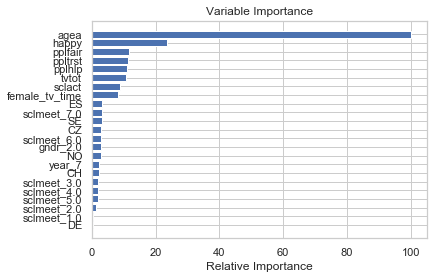

In [136]:
#re-running with tv time influenced by gender
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(
    n_estimators=4000,
    max_depth=3,
    loss='deviance',
    max_features=16,
    subsample=0.95
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It looks like the 'female_tv_time' variable ended up being rather important. This alone brought down the Type II errors in the test set by almost 2%. The Type I errors increased slightly from the original model, but have decreased from our later iterations. The last thing to do is try a bayesiansearch of hyperparameters for the GBC.

In [147]:
params = {
    'n_estimators':Integer(100, 1000, 'normalize'),
    'max_depth':Integer(2, 6, 'normalize'),
    'loss':Categorical(['deviance']),
    'max_features':Integer(1, 23, 'normalize'),
    'subsample':Real(0.4, 1, 'uniform')
}

opt = BayesSearchCV(
    clf,
    params,
    cv=5,
    n_iter=10,
    random_state=973456
)

opt.fit(X_train, Y_train)

print(opt.best_params_)

{'loss': 'deviance', 'max_depth': 2, 'max_features': 16, 'n_estimators': 284, 'subsample': 0.78874672746863}


Training set accuracy:
Percent Type I errors: 0.045726561301212214
Percent Type II errors: 0.18045112781954886

Test set accuracy:
Percent Type I errors: 0.046012269938650305
Percent Type II errors: 0.20122699386503068


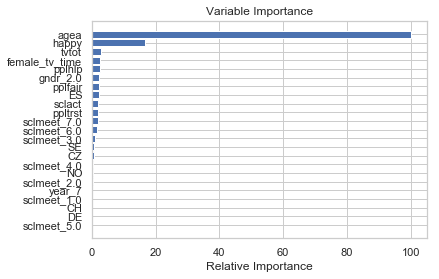

In [141]:
clf = ensemble.GradientBoostingClassifier(
    n_estimators=284,
    max_depth=2,
    loss='deviance',
    max_features=16,
    subsample=0.788746
)
clf.fit(X_train, Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

table_train = pd.crosstab(Y_train, Y_pred_train, margins=True)
table_test = pd.crosstab(Y_test, Y_pred_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()